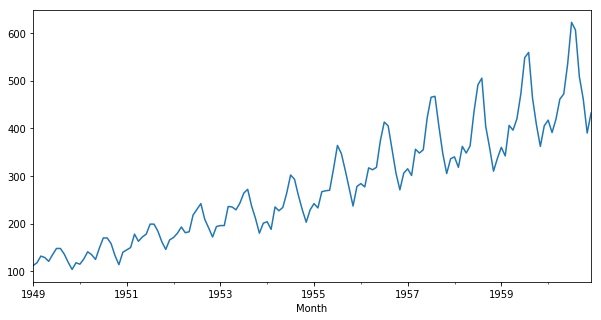

In [3]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt  # major lib for smoothening
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

np.seterr(divide = 'ignore') 


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

dataset = pd.read_csv('C:/Users/DELL/Desktop/JT/AirPassengers.csv',parse_dates=['Month'],
                     index_col='Month',date_parser=dateparse)

ds = dataset['#Passengers']
ds.head()


ds.plot(kind="line",figsize=(10,5))
my_data=dataset['#Passengers']

my_data = np.log(ds)


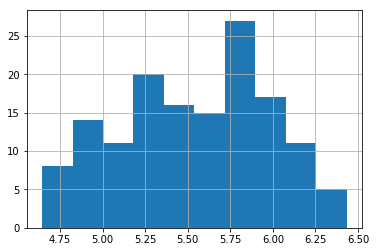

In [4]:

my_data.hist()

In [5]:
#Dickey Fuller Test


from statsmodels.tsa.stattools import adfuller
result = adfuller(my_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


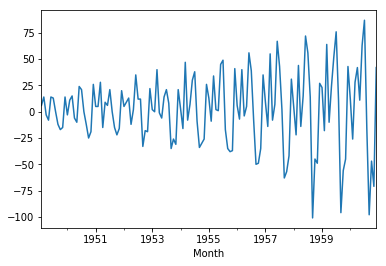

In [6]:
dataset['#Passengers_diff'] = dataset['#Passengers'] - dataset['#Passengers'].shift(1)
kdata = dataset['#Passengers_diff'].dropna()
#print(kdata)
#dataset['#Passengers_diff'].dropna().plot()
#my_data.hist()
#ds.plot(kind="line",figsize=(10,5))
kdata.plot()

from statsmodels.tsa.stattools import adfuller
#X = series.values
result = adfuller(kdata)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

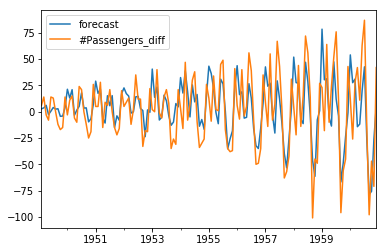

                              ARMA Model Results                              
Dep. Variable:       #Passengers_diff   No. Observations:                  143
Model:                     ARMA(2, 5)   Log Likelihood                -661.291
Method:                       css-mle   S.D. of innovations             23.713
Date:                Sat, 19 Oct 2019   AIC                           1340.582
Time:                        15:09:27   BIC                           1367.248
Sample:                    02-01-1949   HQIC                          1351.418
                         - 12-01-1960                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.6855      0.134     20.037      0.000       2.423       2.948
ar.L1.#Passengers_diff     0.9156      0.086     10.594      0.000       0.746       1.085
ar.L

In [7]:
from statsmodels.tsa.arima_model import ARMA

# 1,2 ARMA Model
model = ARMA(kdata, order=(2,5))
model_fit = model.fit(disp=0)
model_fit.plot_predict(dynamic=False)
plt.show()

print(model_fit.summary())

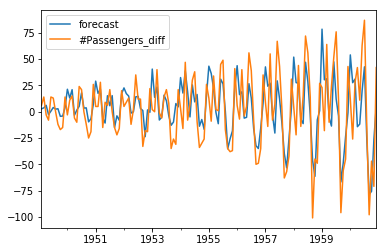

                              ARMA Model Results                              
Dep. Variable:       #Passengers_diff   No. Observations:                  143
Model:                     ARMA(2, 5)   Log Likelihood                -661.291
Method:                       css-mle   S.D. of innovations             23.713
Date:                Sat, 19 Oct 2019   AIC                           1340.582
Time:                        15:10:35   BIC                           1367.248
Sample:                    02-01-1949   HQIC                          1351.418
                         - 12-01-1960                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.6855      0.134     20.037      0.000       2.423       2.948
ar.L1.#Passengers_diff     0.9156      0.086     10.594      0.000       0.746       1.085
ar.L

In [8]:
from statsmodels.tsa.arima_model import ARMA

# 1,2 ARMA Model
model = ARMA(kdata, order=(2,5))
model_fit = model.fit(disp=0)
model_fit.plot_predict(dynamic=False)
plt.show()

print(model_fit.summary())


In [9]:
from statsmodels.tsa.stattools import acf
#kdata = np.log(kdata)
# Create Training and Test
train = kdata[:120]
test = kdata[120:]
#print(kdata)


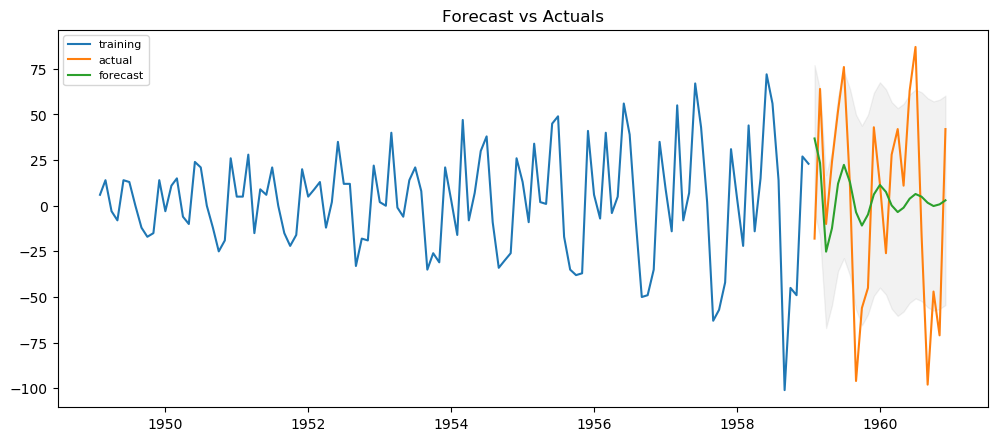

In [10]:
model = ARMA(train, order=(2,5))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(23, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [11]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
print(mape)

me = np.mean(fc - test.values)
print(me)

rmse = np.mean((fc - test.values)**2)**.5
print(rmse)

1.0224491825832367
0.8835160447914397
50.032634067768505
